# <p style="text-align: center;">EE 381V: Statistical Machine Learning</p>
# <p style="text-align: center;">Homework 2: Programming Assignments</p>
## <p style="text-align: center;">Total points: 65  </p>
## <p style="text-align: center;">Due: March 8 by 11:59 pm (submission via Gradescope)</p>

Ideally, your solution to the assignments should be written in and submitted as a **Jupyter notebook**. Please make sure your code runs and the graphics (along with anything else that you want to be considered) are displayed in your notebook before submitting.

For the theoretical parts of the questions below (e.g., computation of gradients), the most convenient approach is to type the solution in the provided spaces ("Markdown" cells) using LaTeX (if not familiar with LaTeX, please check the markdown cells below stating questions for examples of writing equations in LaTeX). Alternatively, you could write down the solution on paper and submit a pdf file of the scan/photo.

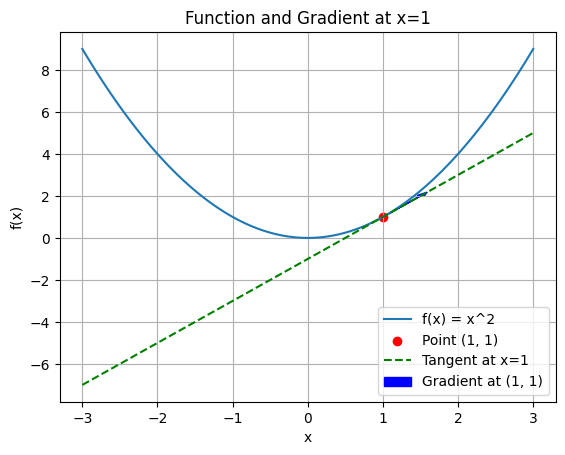

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return x**2

# Define the gradient function
def gradient(x):
    return 2*x

# Define the point x = 1
x_point = 1

# Evaluate the function and gradient at the point x = 1
y_point = f(x_point)
grad_point = gradient(x_point)

# Create an array of x values
x_values = np.linspace(-3, 3, 100)
y_values = f(x_values)

# Plot the function
plt.plot(x_values, y_values, label='f(x) = x^2')
plt.scatter(x_point, y_point, color='red', label='Point (1, 1)')

# Plot the tangent line at the point x = 1
tangent_line = grad_point * (x_values - x_point) + y_point
plt.plot(x_values, tangent_line, color='green', linestyle='--', label='Tangent at x=1')

# Plot the gradient vector at the point x = 1
plt.arrow(x_point, y_point, 0.5, grad_point * 0.5, color='blue', head_width=0.1, head_length=0.2, label='Gradient at (1, 1)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function and Gradient at x=1')
plt.legend()
plt.grid(True)
plt.show()


# <font color='blue'> Question 1: Stochastic Gradient Descent (20 pts) </font>
    
In class, we introduced gradient descent and its stochastic variant. In this problem, we will explore the latter. Assume that we want to predict values of two-dimensional feature vectors, i.e., we are given a dataset $\{({\bf x}_1,y_1),\dots,({\bf x}_N,y_N)\}$ of features ${\bf x}_i = [x_{i1} \;\; x_{i2}]^T$ and their corresponding values $y_i$, and would like to predict value $y$ of a never before seen ${\bf x} = [x_{1} \;\; x_{2}]^T$.

 1. (5 pts) Assuming that we want to learn the coefficients via stochastic gradient descent, derive the update rules for all 4 coefficients (i.e., $w_0$, $w_1$, $w_2$ and $w_3$) of the model 
$$y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1}.$$ 


 2. (15 pts) Write a Python code that implements the SGD rules found in part (a) to train the non-linear model $$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1}.$$ Attempt to format similarly to scikit-learn's models. The template of the class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as inputs X and y. The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to train on data given in "SGD_samples.csv" for 15 epochs, using learning rates [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants [0,10,100]. Plot the mean-square error (MSE) and $w$ parameters as functions of epoch (for 15 epochs) for the best 2 combinations of the learning_rate and regularization for SGD. Report the MSE at the end of 15 epochs for the two best combinations.


In [28]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        
    def sgd(self, gradient):
        self.coef # = please fill this to update self.coef using SGD
    
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                   #please fill this
                # Compute gradients
                    #please fill this
               
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    #def linearPredict(self, X):  
        #compute dot product of self.coef and X

In [29]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

## Answers

### 1. Derive the coefficent updates for all 4 coefficients of the model (use Markdown to type) (5 pts)

\begin{align*}
w_0^{(t+1)} &= w_0^{(t)} - \eta \frac{\partial L_i}{\partial w_0} \\
&= w_0^{(t)} - \eta (-2(y_i - \hat{y}_i)) \\
\\
w_1^{(t+1)} &= w_1^{(t)} - \eta \frac{\partial L_i}{\partial w_1} \\
&= w_1^{(t)} - \eta (-2x_{1i}(y_i - \hat{y}_i)) \\
\\
w_2^{(t+1)} &= w_2^{(t)} - \eta \frac{\partial L_i}{\partial w_2} \\
&= w_2^{(t)} - \eta (-2x_{1i}x_{2i}(y_i - \hat{y}_i)) \\
\\
w_3^{(t+1)} &= w_3^{(t)} - \eta \frac{\partial L_i}{\partial w_3} \\
&= w_3^{(t)} - \eta (-2e^{-x_{1i}}(y_i - \hat{y}_i))
\end{align*}


use tex to write your answer

### 2. Write the code here (10pts)

In [52]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = None
        
    def sgd(self, gradient):
        for i in range(len(self.coef)):
            self.coef[i] -= self.learning_rate * gradient[i]
    
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        self.coef = np.zeros(X.shape[1])  # Initialize coef attribute
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                actual = y[i]
                prediction = self.linearPredict(X[i])
                error = actual - prediction
                
                # Check for NaN or infinite values
                if np.isnan(error) or np.isinf(error):
                    print("Error encountered:", error)
                
                # Compute gradients
                gradient = -2 * error * X[i]
                
                # Check for NaN or infinite values in gradients
                if np.isnan(np.sum(gradient)) or np.isinf(np.sum(gradient)):
                    print("Gradient contains NaN or infinite values:", gradient)
                
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)
            
            # Scale down the data
            residuals_scaled = residuals / np.max(np.abs(residuals))
            
            mse.append(np.mean(residuals_scaled**2))  # Adjusted to use scaled residuals
        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch), mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch), coefs[:,0], label='w0')
            plt.plot(range(self.n_epoch), coefs[:,1], label='w1')
            plt.plot(range(self.n_epoch), coefs[:,2], label='w2')
            plt.plot(range(self.n_epoch), coefs[:,3], label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        return x
        
    def linearPredict(self, X):  
        return np.dot(X, self.coef)


### 3. Explore running the regression with different learning rates and regularization (use the class 'Regression' you completed in the previous section). Plot the required results. (5 pts)


In [ ]:
mse_results = np.zeros((len(learning_rate), len(regularization)))

for i, lr in enumerate(learning_rate):
    for j, reg_param in enumerate(regularization):
        # Initialize Regression instance with current learning rate and regularization parameter
        regression = Regression(learning_rate=lr, regularization=reg_param, n_epoch=n_epochs)
        
        # Fit the model to your data
        regression.fit(X, y)
        
        # Record MSE
        mse_results[i, j] = regression.lowest_mse

# Plot the results
plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rate):
    plt.plot(regularization, mse_results[i], label=f'LR={lr}')
plt.xscale('log')
plt.xlabel('Regularization Parameter')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Learning Rate and Regularization on MSE')
plt.legend()
plt.show()


# <font color='blue'> Question 2: Regularized regression (25 pts)</font>
In this question, we will explore the applications of ridge (i.e., $l_2$-norm) and lasso ($l_1$-norm) regularized regression using sklearn package in Python. To this end, we will use the dataset Fish.csv (posted to Canvas). The dataset is taken from https://www.kaggle.com/aungpyaeap/fish-market and includes 7 columns with 6 features (variables) of the fish and 1 target (label):

x1: Species: Species name of fish (nonnumeric)\
x2: Length1: Vertical length in cm\
x3: Length2: Diagonal length in cm\
x4: Length3: Cross length in cm\
x5: Height: Height in cm\
x6: Width: Diagonal width in cm

y: Weight of the fish in grams

We want to learn the function $y = w_1x_1+w_2x_2+w_3x_3+w_4x_4+w_5x_5+w_6x_6$ to predict the weight of a fish from the features.

* Use the below code to load the dataset. Create a train_test split of 75:25 with random state = 50

* Scale the data so that each of the independent variables has zero mean and unit variance. You can use  [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this.

In [66]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None


df = pd.read_csv("Fish.csv", index_col=0)
df = df[~df.isin([0, np.nan, np.inf, -np.inf]).any(axis=1)]

X = df.drop(['Weight'], axis=1)
y = df['Weight']

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

# Scale the independent variables (features)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

a) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to run [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can create this range of values as follows:

      import numpy as np
      alphas =  10**np.linspace(10,-2,100)*0.5

Report the best $\lambda$ based on cross validation. The cross validation should happen on your training data using average MSE as the scoring metric. (5pts)

b) Run ridge and lasso regression for all alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one figure each for lasso and ridge, so a total of two figures; the results for different features should be plotted in the same figure. What do you qualitatively observe as the value of the regularization parameter is changed? (5pts)

c) Run the (unconstrained) linear regression and its regularized variants (both ridge and lasso) on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) and the mean-squared error (MSE) on the test data for each method. (3pts)

d) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross-validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross-validation. Run lasso on the training data using the best $\lambda$ and report the coefficients for all variables. (3pts)

e) Why did we have to scale the data before regularization? (3pts)

f) Lasso and ridge regularization techniques are often used to combat overfitting during linear regression. Which of the two yields sparser models (i.e., fewer parameters) when the tuning parameter $\lambda$ is large (but not infinite)? (3pts)

g) [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) is a type of a regression model that uses combined $l_1$ and $l_2$ priors as regularizers. Run ElasticNet with the same values of alphas on the training data, and find the best value for alpha based on the MSE. Report the MSE on test data and plot a graph showing the predicted and actual values/labels. Comment/compare the results of the three regression models. (3pts)

## Answers

### a. (5 pts)

In [74]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Define the range of alpha values
alphas = 10**np.linspace(10,-2,100)*0.5

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store average MSE for Lasso and Ridge
avg_mse_lasso = []
avg_mse_ridge = []

# Perform 5-fold cross-validation for each alpha value
for alpha in alphas:
    lasso_mse_scores = []
    ridge_mse_scores = []
    
    for train_index, val_index in kf.split(X_train_scaled):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        lasso = Lasso(alpha=alpha, max_iter=10000)
        ridge = Ridge(alpha=alpha)
        
        lasso.fit(X_train_fold, y_train_fold)
        ridge.fit(X_train_fold, y_train_fold)
        
        lasso_pred = lasso.predict(X_val_fold)
        ridge_pred = ridge.predict(X_val_fold)
        
        lasso_mse = mean_squared_error(y_val_fold, lasso_pred)
        ridge_mse = mean_squared_error(y_val_fold, ridge_pred)
        
        lasso_mse_scores.append(lasso_mse)
        ridge_mse_scores.append(ridge_mse)
    
    avg_mse_lasso.append(np.mean(lasso_mse_scores))
    avg_mse_ridge.append(np.mean(ridge_mse_scores))

# Report the best alpha (lambda) for Lasso and Ridge
best_alpha_lasso = alphas[np.argmin(avg_mse_lasso)]
best_alpha_ridge = alphas[np.argmin(avg_mse_ridge)]

print("Best lambda for Lasso:", best_alpha_lasso)
print("Best lambda for Ridge:", best_alpha_ridge)


Best lambda for Lasso: 0.7599555414764666
Best lambda for Ridge: 0.14240179342179024


### b. (5 pts)

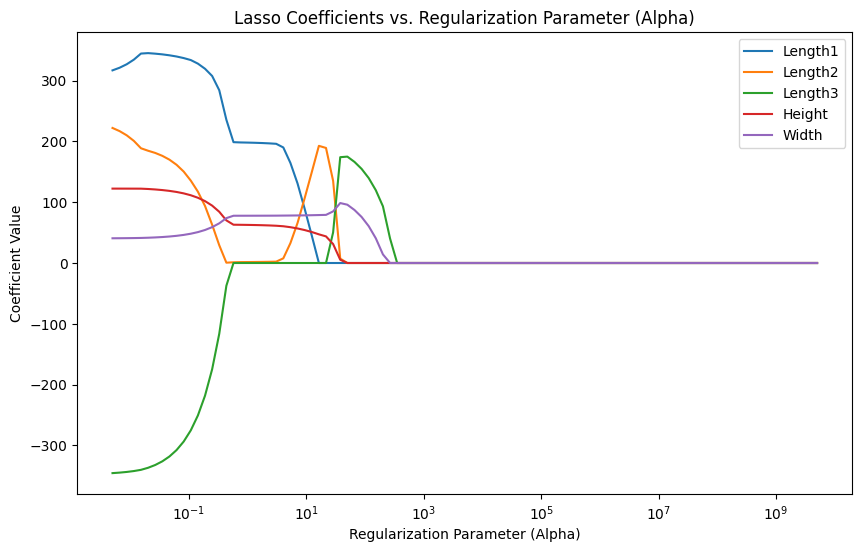

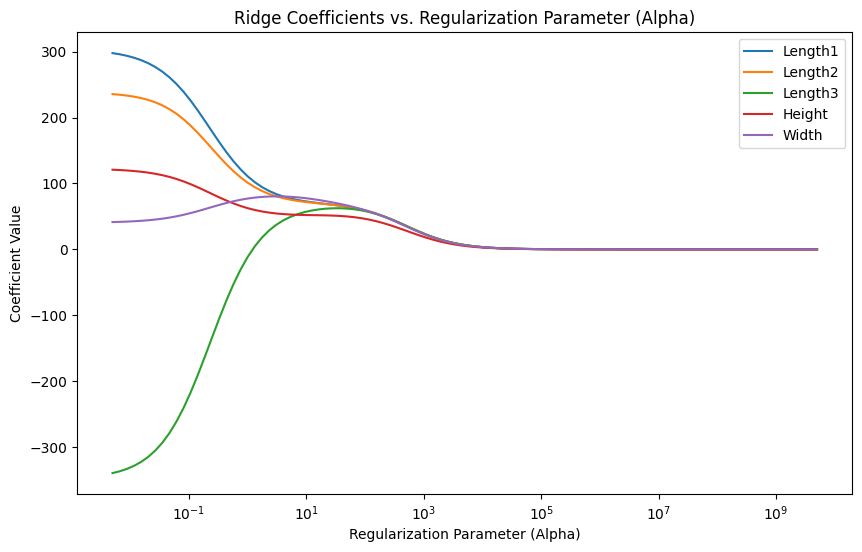

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge

# Define the range of alpha values
alphas = 10**np.linspace(10,-2,100)*0.5

# Initialize Lasso and Ridge models
lasso = Lasso(max_iter=10000)
ridge = Ridge()

# Initialize lists to store coefficients for Lasso and Ridge
lasso_coefficients = []
ridge_coefficients = []

# Run Lasso regression for all alpha values
for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    lasso_coefficients.append(lasso.coef_)

# Run Ridge regression for all alpha values
for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_coefficients.append(ridge.coef_)

# Plot coefficients for Lasso regression
plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_coefficients)
plt.xscale('log')
plt.title('Lasso Coefficients vs. Regularization Parameter (Alpha)')
plt.xlabel('Regularization Parameter (Alpha)')
plt.ylabel('Coefficient Value')
plt.legend(X.columns, loc='upper right')
plt.show()

# Plot coefficients for Ridge regression
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_coefficients)
plt.xscale('log')
plt.title('Ridge Coefficients vs. Regularization Parameter (Alpha)')
plt.xlabel('Regularization Parameter (Alpha)')
plt.ylabel('Coefficient Value')
plt.legend(X.columns, loc='upper right')
plt.show()


### c. (3 pts)

In [77]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Fit linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# Fit Ridge regression model with optimal alpha
ridge = Ridge(alpha=best_alpha_ridge)
ridge.fit(X_train_scaled, y_train)

# Fit Lasso regression model with optimal alpha
lasso = Lasso(alpha=best_alpha_lasso)
lasso.fit(X_train_scaled, y_train)

# Make predictions on the test data
linear_reg_pred = linear_reg.predict(X_test_scaled)
ridge_pred = ridge.predict(X_test_scaled)
lasso_pred = lasso.predict(X_test_scaled)

# Calculate prediction errors
linear_reg_mae = mean_absolute_error(y_test, linear_reg_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)

linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

# Print the prediction errors
print("Linear Regression MAE:", linear_reg_mae)
print("Ridge Regression MAE:", ridge_mae)
print("Lasso Regression MAE:", lasso_mae)

print("Linear Regression MSE:", linear_reg_mse)
print("Ridge Regression MSE:", ridge_mse)
print("Lasso Regression MSE:", lasso_mse)


Linear Regression MAE: 103.37374547993404
Ridge Regression MAE: 104.6478729832916
Lasso Regression MAE: 105.38614723327737
Linear Regression MSE: 19410.704667319835
Ridge Regression MSE: 19627.64369099974
Lasso Regression MSE: 19837.994457121524


### d. (3 pts)

In [78]:
from sklearn.linear_model import LassoCV

# Initialize LassoCV model with specified parameters
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)

# Fit LassoCV model to the training data
lasso_cv.fit(X_train_scaled, y_train)

# Get the optimal alpha value for Lasso
optimal_alpha_lasso_cv = lasso_cv.alpha_

print("Optimal lambda for Lasso with cross-validation:", optimal_alpha_lasso_cv)

# Fit Lasso model to the training data using the optimal alpha
lasso = Lasso(alpha=optimal_alpha_lasso_cv, max_iter=10000)
lasso.fit(X_train_scaled, y_train)

# Report the coefficients for all variables
lasso_coefficients = lasso.coef_
print("Coefficients for all variables:", lasso_coefficients)


Optimal lambda for Lasso with cross-validation: 0.7609265050141203
Coefficients for all variables: [198.30101535   1.49049364  -0.          62.83734892  77.75461969]


### e. (3 pts)

- Scaling prevents features with larger magnitudes from dominating the regularization process
- Faster convergence

### f. (3 pts)

- Lasso regularization techniques are more likely to converge a coefficient to exactly 0, which removes the feature, leading to sparser models

### g. (3 pts)

MSE on test data for Linear Regression: 19410.704667319835
MSE on test data for Lasso Regression: 19837.994457121524
MSE on test data for Ridge Regression: 23637.794102861553
MSE on test data for ElasticNet Regression: 21886.967910604268


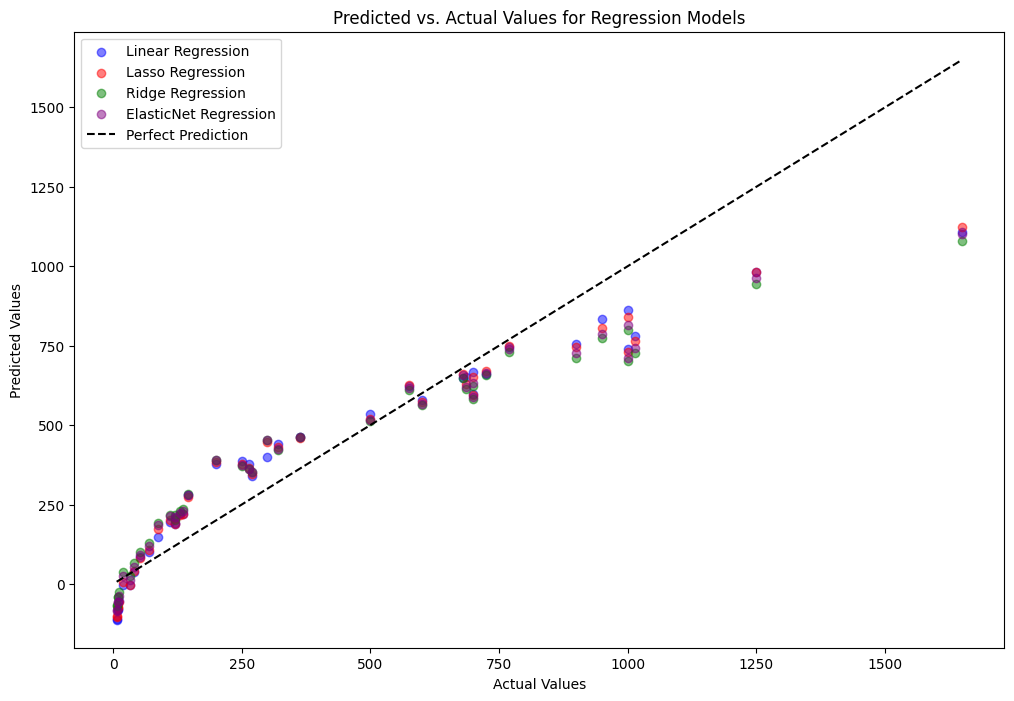

In [85]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, ElasticNet
from sklearn.metrics import mean_squared_error

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
y_pred_linear = linear_reg.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Lasso Regression
lasso_cv = LassoCV(alphas=alphas, cv=10, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)
best_alpha_lasso = lasso_cv.alpha_
lasso = Lasso(alpha=best_alpha_lasso)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Ridge Regression
ridge_cv = RidgeCV(alphas=alphas, cv=10)
ridge_cv.fit(X_train_scaled, y_train)
best_alpha_ridge = ridge_cv.alpha_
ridge = Ridge(alpha=best_alpha_ridge)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# ElasticNet Regression
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=10, max_iter=10000)
elasticnet_cv.fit(X_train_scaled, y_train)
best_alpha_elasticnet = elasticnet_cv.alpha_
elasticnet = ElasticNet(alpha=best_alpha_elasticnet)
elasticnet.fit(X_train_scaled, y_train)
y_pred_elasticnet = elasticnet.predict(X_test_scaled)
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)

# Report MSE for all models
print("MSE on test data for Linear Regression:", mse_linear)
print("MSE on test data for Lasso Regression:", mse_lasso)
print("MSE on test data for Ridge Regression:", mse_ridge)
print("MSE on test data for ElasticNet Regression:", mse_elasticnet)

# Plot predicted vs. actual values for all models
plt.figure(figsize=(12, 8))

# Linear Regression
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5, label='Linear Regression')

# Lasso Regression
plt.scatter(y_test, y_pred_lasso, color='red', alpha=0.5, label='Lasso Regression')

# Ridge Regression
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.5, label='Ridge Regression')

# ElasticNet Regression
plt.scatter(y_test, y_pred_elasticnet, color='purple', alpha=0.5, label='ElasticNet Regression')

# Perfect Prediction Line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='Perfect Prediction')

plt.title('Predicted vs. Actual Values for Regression Models')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()


# <font color='blue'> Question 3: Feature Selection (20 pts)</font>

In this question, we will explore the importance of feature selection. You may use the code below to load the dataset "zoo.csv" which contains a set of features for different animals and the output variable ("class_type"). 

1. Show the correlation matrix for this dataset; its dimension should be n_features x n_features. List the top 5 most positively correlated features with class_type. (**3pts**)

2. List top-5 most negatively correlated features with class_type. (**3pts**)

3. Use https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE to perform feature selection with estimator = LogisticRegression(max_iter=1000). List the top 5 features selected by RFE. (**2pts**)

To proceed, create a train_test split of 80:20 (training:test) with random state = 50. As part of the preprocessing, we should use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html): Instead of fitting a model to the original data, we use StandardScaler to first center each feature ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Remember that when dealing with training and testing data, we fit preprocessing parameters using training data and apply them to testing data. You should scale only the features (independent variables), not the target variable y.

4. Train a [Linear Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) using training data and report the ${R^2}$ score on the test set for each of the following:

   a) Model trained with top-5 most positvely correlated features from part 1. (**2pts**)
   
   b) Model trained with top-5 most negatively correlated features from part 2. (**2pts**)
   
   c) Model trained with five features selected by RFE in part 3. (**2pts**)
   
   d) Finally, train a linear regressor on the entire training data using all the original features. (**2pts**)


5. Comment on your results.  (**4pts**) 

In [ ]:
import pandas as pd
from sklearn.model_selection import (train_test_split,KFold)

df = pd.read_csv("zoo.csv")
df = df.drop(['animal_name'], axis = 1)
meta_val = (df['class_type'] <= 4) + 0
df['class_type']=meta_val

y = df['class_type'].values
X = df.drop(['class_type'], axis = 1)

from sklearn import preprocessing
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state=50)


df_corr = pd.DataFrame(X_train)
df_corr['class_type'] = Y_train

In [ ]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


##### ANSWER 